# Preparar base


In [ ]:
!pip install python-louvain
import librosa
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import pdist, squareform
#import igraph as ig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!cp  "/content/drive/MyDrive/cv-corpus-13.0-2023-03-09-pt.tar.gz" "./cv-corpus-13.0-2023-03-09-pt.tar.gz"

cp: cannot stat '/content/drive/MyDrive/cv-corpus-13.0-2023-03-09-pt.tar.gz': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xvzf "/content/drive/MyDrive/cv-corpus-13.0-2023-03-09-pt.tar.gz"

A saída de streaming foi truncada nas últimas 5000 linhas.
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918038.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918045.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918046.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918044.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918036.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918057.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918058.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918059.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918060.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918068.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918070.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918067.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918069.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_36918071.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voi

'''  
# calcula as medidas de centralidade
  in_degree = np.sum(adj_matrix, axis=0)
  out_degree = np.sum(adj_matrix, axis=1)
  degree_centrality = (in_degree + out_degree) / (n_vertices - 1)
  closeness_centrality = 1 / np.sum(dist_matrix, axis=1)
  eigenvector_centrality = np.abs(np.linalg.eigvals(adj_matrix))

  # imprime as medidas de centralidade
  print("Grau de entrada:", in_degree)
  print("Grau de saída:", out_degree)
  print("Centralidade de grau:", degree_centrality)
  print("Centralidade de proximidade:", closeness_centrality)
  print("Centralidade de autovetor:", eigenvector_centrality)
  '''

In [ ]:
"""
from imblearn.over_sampling import SMOTE

Amostragem
Normalização
Filtragem
Segmentação
Extração de características:
*Frequência fundamental (F0)
*Formantes
*Intensidade
*Duração
*Mel-frequency cepstral coefficients (MFCCs)
*Spectral flux

"""

'\nfrom imblearn.over_sampling import SMOTE\n\nAmostragem\nNormalização\nFiltragem\nSegmentação\nExtração de características:\n*Frequência fundamental (F0)\n*Formantes\n*Intensidade\n*Duração\n*Mel-frequency cepstral coefficients (MFCCs)\n*Spectral flux\n\n'

In [ ]:

def matriz(audio):
    # carrega o arquivo de áudio
    audio_file = audio
    audio_data, sr = librosa.load(audio_file)

    # calcula o espectrograma
    spectrogram = np.abs(librosa.stft(audio_data))

    # define os limiares para a segmentação
    thresh_freq = np.max(spectrogram) * 0.1
    thresh_time = 0.1

    # segmenta o espectrograma em regiões de interesse
    spectrogram[spectrogram < thresh_freq] = 0
    spectrogram[spectrogram >= thresh_freq] = 1
    spectrogram = np.diff(spectrogram, axis=1)
    onsets = np.where(spectrogram > thresh_time)

    # cria uma lista de vértices
    vertices = list(set(onsets[0]))

    # cria uma lista de arestas
    edges = []
    for i in range(len(onsets[0])-1):
        if onsets[0][i+1] - onsets[0][i] < 50:
            edges.append((onsets[0][i], onsets[0][i+1]))

    # converte as posições em edges para índices em vertices
    edges = [(vertices.index(e[0]), vertices.index(e[1])) for e in edges]

    # retorna a lista de arestas
    return edges

def calcular_similaridade(audio_path):
    # Carrega a lista de áudios
    audio_list = []
    
    #audio_path = os.path.join(audio_dir)
    audio_data, sr = librosa.load(audio_path)
    audio_list.append(audio_data)


    # Calcula a matriz de similaridade
    similarity_matrix = np.zeros((len(audio_list), len(audio_list)))
    for i in range(len(audio_list)):
        for j in range(i, len(audio_list)):
            edges1 = matriz(audio_list[i])
            edges2 = matriz(audio_list[j])
            similarity = len(set(edges1).intersection(edges2)) / float(len(set(edges1).union(edges2)))
            similarity_matrix[i,j] = similarity
            similarity_matrix[j,i] = similarity

    return similarity_matrix

In [ ]:
matrizT = matriz('/content/voz1.wav')
G = nx.Graph()
G.add_edges_from(matrizT)
# Visualizando o grafo gerado
pos = nx.spring_layout(G)  # definindo um layout para o grafo
nx.draw_networkx(G, pos=pos)
plt.show()

In [ ]:
similarity_matrix = calcular_similaridade('/content/cv-corpus-13.0-2023-03-09/pt/clips/')

In [ ]:
# Plota a matriz de similaridade
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
data_dir = "./cv-corpus-13.0-2023-03-09"
matrizT = []
# carrega o arquivo de áudio

matrizT.append(calcular_similaridade('/content/cv-corpus-13.0-2023-03-09/pt/clips/'))

In [ ]:
data_dir = "./cv-corpus-13.0-2023-03-09"
matrizT = []
# carrega o arquivo de áudio
count = 0
for root, dirs, files in os.walk(data_dir):
  for name in files:
    if(name.endswith('.mp3')):
      matrizT.append(calcular_similaridade(os.path.join(root, name)))
      count+=1
    if count == 10:
      break

In [ ]:
for item in matrizT:
  G = nx.Graph()
  G.add_edges_from(item)
  # Visualizando o grafo gerado
  pos = nx.spring_layout(G)  # definindo um layout para o grafo
  nx.draw_networkx(G, pos=pos)
  plt.show()

#Execução dos audios


In [ ]:
import numpy as np 
import librosa 
 
# definindo as funções para processar os áudios e calcular a similaridade 
def load_audio(file_path): 
    audio, sr = librosa.load(file_path) 
    return audio, sr 
 
def extract_features(audio, sr): 
    features = librosa.feature.mfcc(y=audio, sr=sr) 
    return features 
 
def calculate_similarity(features1, features2): 
    return np.linalg.norm(features1 - features2) 
 
# carregando os arquivos de áudio e extraindo suas características 
audio_paths = ['cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285498.mp3','cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285485.mp3','cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285488.mp3'] 
features = [] 
for path in audio_paths: 
    audio, sr = load_audio(path) 
    feature = extract_features(audio, sr) 
    features.append(feature) 
 
# criando a matriz de adjacência a partir das similaridades entre os áudios 
num_audios = len(audio_paths) 
adj_matrix = np.zeros((num_audios, num_audios)) 
for i in range(num_audios): 
    for j in range(i+1, num_audios): 
        similarity = calculate_similarity(features[i], features[j]) 
        adj_matrix[i, j] = similarity 
        adj_matrix[j, i] = similarity 
 
# imprimindo a matriz de adjacência 
print(adj_matrix)


#Primeiro teste funcional com uma rede

In [ ]:
import numpy as np
import librosa

# definindo as funções para processar os áudios e calcular a similaridade
def load_audio(file_path):    
  audio, sr = librosa.load(file_path)
  return audio, sr
def extract_features(audio, sr):
  features = librosa.feature.mfcc(y=audio, sr=sr)
  return features
def calculate_similarity(features1, features2):    
  return np.linalg.norm(features1 - features2)

# carregando os arquivos de áudio e extraindo suas características
audio1, sr1 = load_audio('cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285498.mp3')
audio1 = librosa.util.fix_length(data=audio1, size=sr1 * 3)
features1 = extract_features(audio1, sr1)

audio2, sr2 = load_audio('cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285485.mp3')
audio2 = librosa.util.fix_length(data=audio2, size=sr2 * 3)
features2 = extract_features(audio2, sr2)

audio3, sr3 = load_audio('cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285488.mp3')
audio3 = librosa.util.fix_length(data=audio3, size=sr3 * 3)
features3 = extract_features(audio3, sr3)

# criando a matriz de adjacência a partir das similaridades entre os áudios
adj_matrix = np.zeros((3, 3))
adj_matrix[0, 1] = calculate_similarity(features1, features2)
adj_matrix[1, 0] = adj_matrix[0, 1]
adj_matrix[1, 2] = calculate_similarity(features2, features3)
adj_matrix[2, 1] = adj_matrix[1, 2]
adj_matrix[2, 0] = calculate_similarity(features3, features1)
adj_matrix[0, 2] = adj_matrix[2, 0]

# imprimindo a matriz de adjacência
print(adj_matrix)

In [ ]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
 
# Definir matriz de adjacência 
adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699], 
                       [2196.96020508, 0.0, 1833.59375], 
                       [1928.50866699, 1833.59375, 0.0]]) 

# Arredondar a matriz para 2 casas decimais
adj_matrix = np.round(adj_matrix, 2) 
 
# Criar grafo não-direcionado 
G = nx.Graph() 
 
# Adicionar nós ao grafo 
for i in range(adj_matrix.shape[0]): 
    G.add_node(i) 

# Definir os rótulos dos vértices
labels = {i: f"Vértice {i}" for i in range(adj_matrix.shape[0])}
 
# Adicionar arestas ao grafo com pesos 
for i in range(adj_matrix.shape[0]): 
    for j in range(i+1, adj_matrix.shape[0]): 
        G.add_edge(i, j, weight=adj_matrix[i, j]) 
 
# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo 
pos = nx.spring_layout(G) 
nx.draw(G, pos) 

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='red') 

plt.show()




cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285498.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285485.mp3
cv-corpus-13.0-2023-03-09/pt/clips/common_voice_pt_37285488.mp3

#Implementando automatização


Parte primária


In [ ]:
import numpy as np
import librosa

# definindo as funções para processar os áudios e calcular a similaridade
def load_audio(file_path):    
  audio, sr = librosa.load(file_path)
  return audio, sr
def extract_features(audio, sr):
  features = librosa.feature.mfcc(y=audio, sr=sr)
  return features
def calculate_similarity(features1, features2):    
  return np.linalg.norm(features1 - features2)

data_dir = "./cv-corpus-13.0-2023-03-09"
audio_list = []
# carrega o arquivo de áudio
count = 0
for root, dirs, files in os.walk(data_dir):
  for name in files:
    if(name.endswith('.mp3')):
      audio_list.append(os.path.join(root, name))
      count+=1
    if count == 100:
      break

num_audios = len(audio_list)
features_list = []

for item in audio_list:
  audio, sr = load_audio(str(item))
  audio = librosa.util.fix_length(data=audio, size=sr * 3)
  features = extract_features(audio, sr)
  features_list.append(features)


# criando a matriz de adjacência a partir das similaridades entre os áudios
adj_matrix = np.zeros((num_audios, num_audios))

for i in range(num_audios):
    for j in range(i+1, num_audios):
        similarity = calculate_similarity(features_list[i], features_list[j])
        adj_matrix[i, j] = similarity
        adj_matrix[j, i] = similarity

# imprimindo a matriz de adjacência
print(adj_matrix)

[[   0.         2894.85107422 4194.50146484 ... 3375.39892578
  2905.30834961 5513.73193359]
 [2894.85107422    0.         3736.54541016 ... 3292.1640625
  2467.9855957  4310.3359375 ]
 [4194.50146484 3736.54541016    0.         ... 2102.66601562
  4338.12548828 2495.6472168 ]
 ...
 [3375.39892578 3292.1640625  2102.66601562 ...    0.
  3685.8527832  3192.16308594]
 [2905.30834961 2467.9855957  4338.12548828 ... 3685.8527832
     0.         5120.48632812]
 [5513.73193359 4310.3359375  2495.6472168  ... 3192.16308594
  5120.48632812    0.        ]]


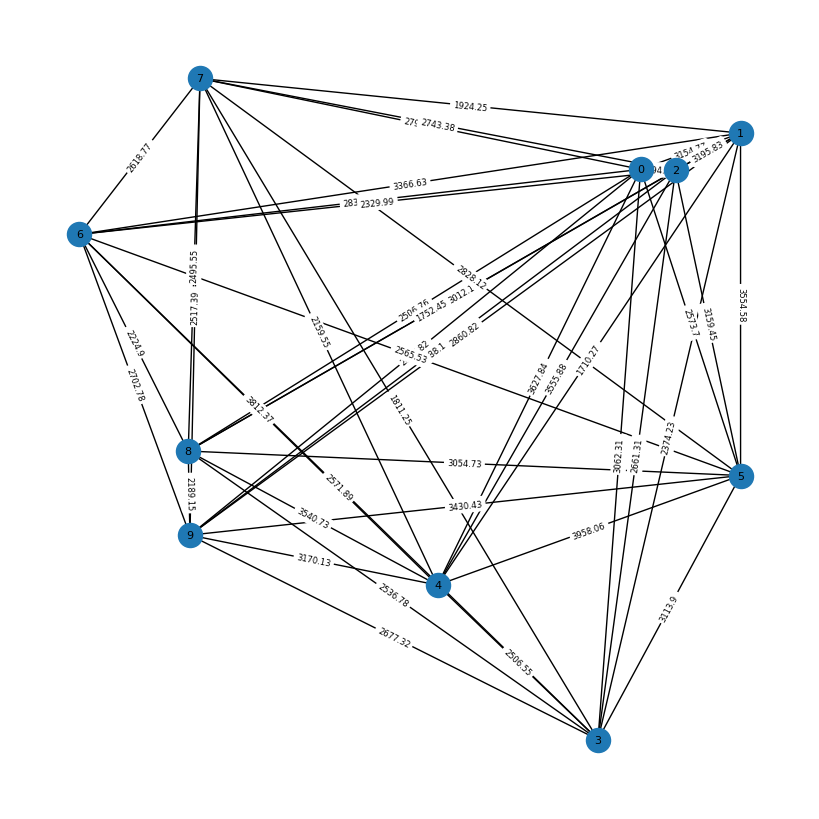

In [ ]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 


# Arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2) 

# Criar grafo não-direcionado 
G = nx.Graph()
 
# Adicionar nós ao grafo 
for i in range(adj_matrix.shape[0]): 
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}
 
# Adicionar arestas ao grafo com pesos 
for i in range(adj_matrix.shape[0]): 
    for j in range(i+1, adj_matrix.shape[0]): 
        G.add_edge(i, j, weight=adj_matrix[i, j]) 
 

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo
pos = nx.spring_layout(G,weight='weight')
nx.draw(G, pos)

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='black')



plt.show()

Parte secundária com testes do 'Louvain'

<ipython-input-11-2a9dd8df4188>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, node_color='lightblue', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.get_cmap('viridis'))


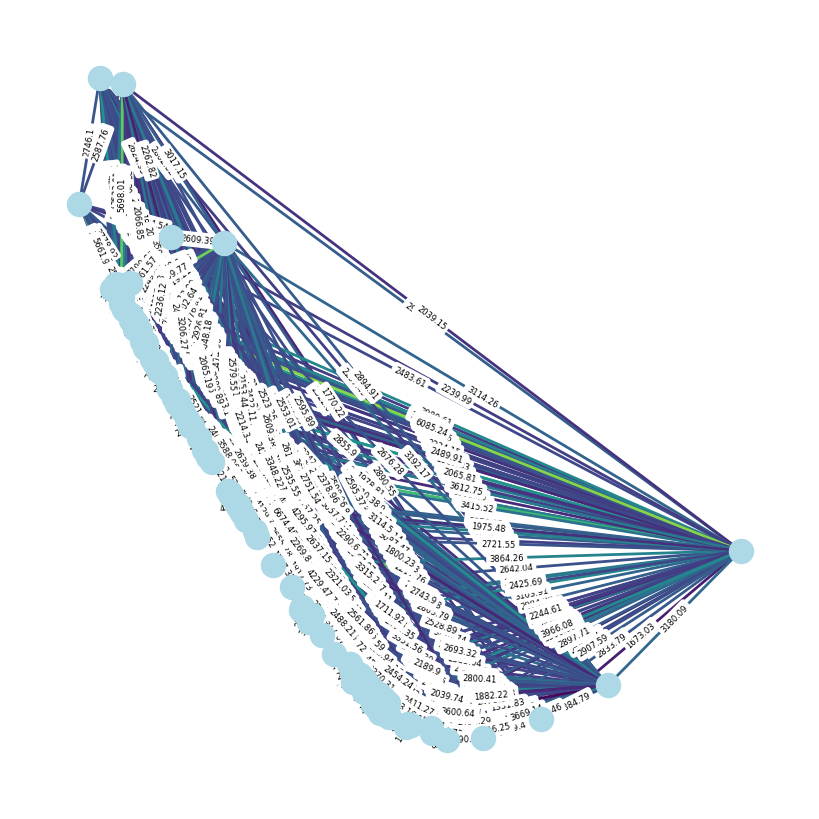

In [ ]:

import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
import community

# Definir matriz de adjacência 
#adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699], 
                       #[2196.96020508, 0.0, 1833.59375], 
                       #[1928.50866699, 1833.59375, 0.0]]) 

# Arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2) 

# Criar grafo não-direcionado 
G = nx.Graph()
 
# Adicionar nós ao grafo 
for i in range(adj_matrix.shape[0]): 
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}
 
# Adicionar arestas ao grafo com pesos 
for i in range(adj_matrix.shape[0]): 
    for j in range(i+1, adj_matrix.shape[0]): 
        G.add_edge(i, j, weight=adj_matrix[i, j]) 
 

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo
pos = nx.spring_layout(G, weight='weight')

# Atribuir cores às arestas com base nos pesos
edge_colors = [adj_matrix[i, j] for i, j in G.edges()]
edge_colors = np.interp(edge_colors, (min(edge_colors), max(edge_colors)), (0, 1))  # Escalar os valores para o intervalo [0, 1]

# Desenhar as arestas com cores diferentes
nx.draw(G, pos, node_color='lightblue', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.get_cmap('viridis'))

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='black')

plt.show()

<ipython-input-15-36a5656d67df>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, node_color='lightblue', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.get_cmap('viridis'))


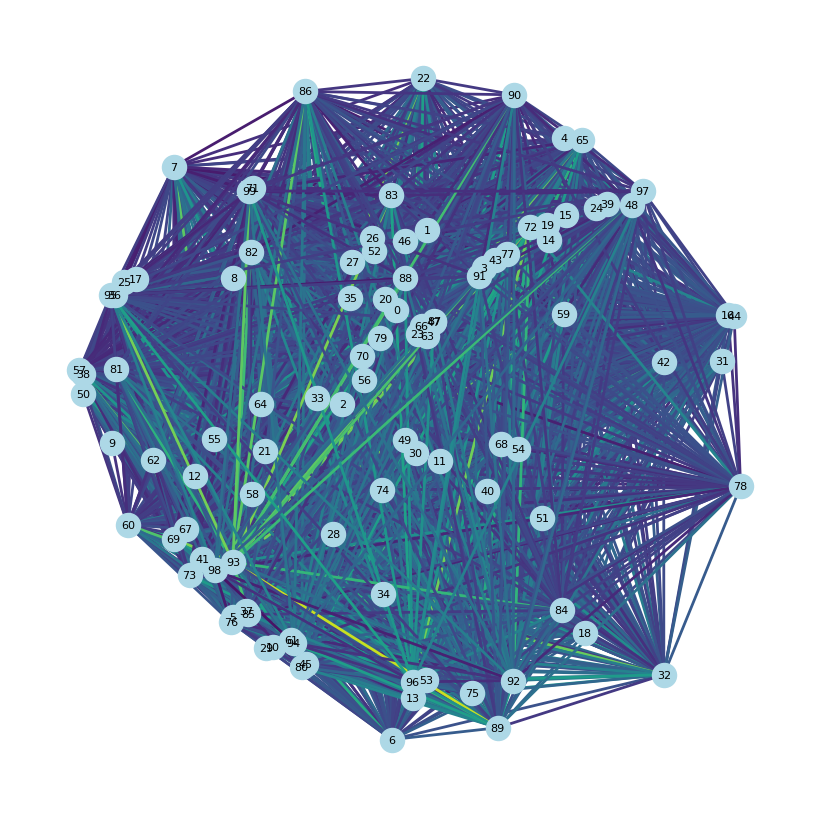

In [ ]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
import community

# Definir matriz de adjacência 
#adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699], 
                       #[2196.96020508, 0.0, 1833.59375], 
                       #[1928.50866699, 1833.59375, 0.0]]) 

# Arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2) 

# Criar grafo não-direcionado 
G = nx.Graph()
 
# Adicionar nós ao grafo 
for i in range(adj_matrix.shape[0]): 
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}
 
# Adicionar arestas ao grafo com pesos 
for i in range(adj_matrix.shape[0]): 
    for j in range(i+1, adj_matrix.shape[0]): 
        G.add_edge(i, j, weight=adj_matrix[i, j]) 
 

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Calcular as distâncias ideais entre os nós com base nos pesos das arestas
k = 1 / np.mean(adj_matrix)  # Ajuste esse valor para controlar a distância entre os nós

# Exibir grafo com distância ajustada
pos = nx.spring_layout(G, weight='weight', k=k)

# Atribuir cores às arestas com base nos pesos
edge_colors = [adj_matrix[i, j] for i, j in G.edges()]
edge_colors = np.interp(edge_colors, (min(edge_colors), max(edge_colors)), (0, 1))  # Escalar os valores para o intervalo [0, 1]

# Desenhar as arestas com cores diferentes
nx.draw(G, pos, node_color='lightblue', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.get_cmap('viridis'))

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
#edge_labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=0.5, font_color='black')

plt.show()

#Iniciando Louvain-Metohd


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Definir matriz de adjacência
"""adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699],
                       [2196.96020508, 0.0, 1833.59375],
                       [1928.50866699, 1833.59375, 0.0]])
"""
# Arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2)

# Criar grafo não-direcionado
G = nx.Graph()

# Adicionar nós ao grafo
for i in range(adj_matrix.shape[0]):
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}

# Adicionar arestas ao grafo com pesos
for i in range(adj_matrix.shape[0]):
    for j in range(i + 1, adj_matrix.shape[0]):
        G.add_edge(i, j, weight=adj_matrix[i, j])

# Executar o algoritmo Louvain
partition = community.best_partition(G)

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo
pos = nx.spring_layout(G)

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='black')

# Colorir os nós de acordo com as comunidades
values = [partition.get(node) for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=values, cmap=plt.cm.get_cmap('viridis'))

plt.show()


AttributeError: ignored

<ipython-input-6-6e1ee2ec6486>:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx_nodes(G, pos, node_color=values, cmap=plt.cm.get_cmap('plasma'))


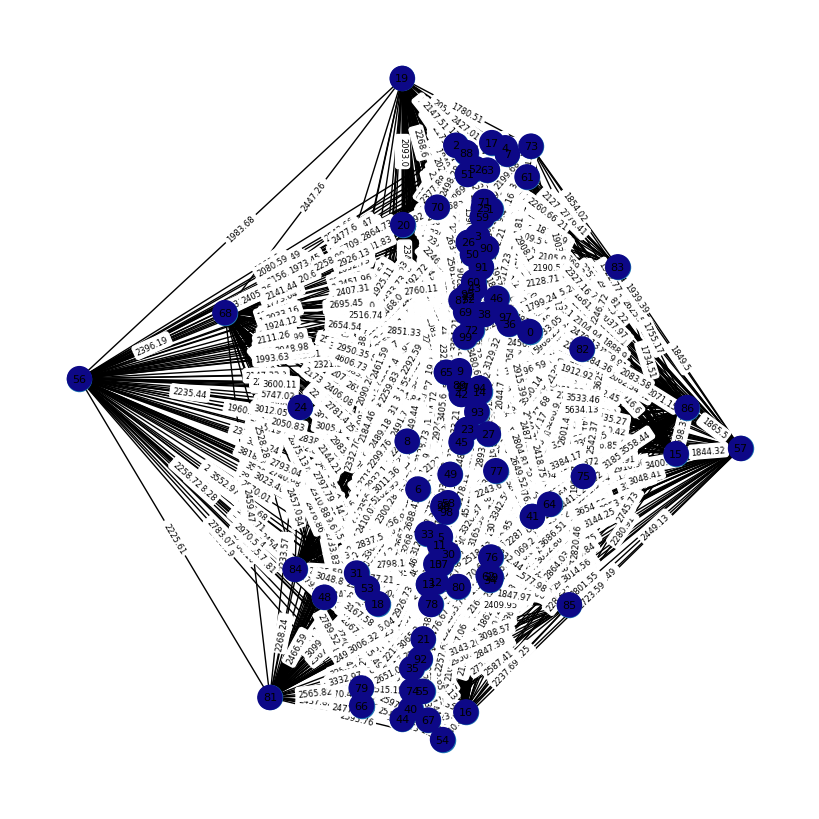

In [ ]:

import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt
from community import community_louvain

# Definir matriz de adjacência 
#adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699], 
                       #[2196.96020508, 0.0, 1833.59375], 
                       #[1928.50866699, 1833.59375, 0.0]]) 

# Arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2) 

# Criar grafo não-direcionado 
G = nx.Graph()
 
# Adicionar nós ao grafo 
for i in range(adj_matrix.shape[0]): 
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}
 
# Adicionar arestas ao grafo com pesos 
for i in range(adj_matrix.shape[0]): 
    for j in range(i+1, adj_matrix.shape[0]): 
        G.add_edge(i, j, weight=adj_matrix[i, j]) 
 

# Detecção de comunidades usando o algoritmo Louvain do networkx
partition = community_louvain.best_partition(G)

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo
pos = nx.spring_layout(G)
nx.draw(G, pos)

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='black')

# Colorir os nós de acordo com as comunidades
values = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=values, cmap=plt.cm.get_cmap('plasma'))

plt.show()

#Girvan-Newman


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import librosa
import os

# Método de Girvan-Newman para detecção de comunidades
def girvan_newman(graph, num_edges_to_keep):
    if len(graph.edges()) == 0:
        return [graph.nodes()]

    def edge_betweenness(graph):
        betweenness = nx.edge_betweenness_centrality(graph)
        max_betweenness = max(betweenness.values())
        return [(edge, centrality) for edge, centrality in betweenness.items() if centrality == max_betweenness]

    def most_connected_subgraph(graph):
        subgraphs = nx.connected_components(graph)
        return max(subgraphs, key=len)

    components = [c for c in nx.connected_components(graph)]
    removed_edges = []
    while len(components) == 1:
        edge_centralities = edge_betweenness(graph)
        if not edge_centralities:
            return components, removed_edges  # retorna componentes e arestas removidas quando não há mais arestas
        edges_to_remove = [edge for edge, centrality in edge_centralities[:num_edges_to_keep]]
        removed_edges.extend(edges_to_remove)
        graph.remove_edges_from(edges_to_remove)
        components = [most_connected_subgraph(graph)]

    return components, removed_edges

# definindo as funções para processar os áudios e calcular a similaridade
def load_audio(file_path):    
    audio, sr = librosa.load(file_path)
    return audio, sr

def extract_features(audio, sr):
    features = librosa.feature.mfcc(y=audio, sr=sr)
    return features

def calculate_similarity(features1, features2):    
    return np.linalg.norm(features1 - features2)

data_dir = "./cv-corpus-13.0-2023-03-09"
audio_list = []
# carrega o arquivo de áudio
count = 0
for root, dirs, files in os.walk(data_dir):
    for name in files:
        if name.endswith('.mp3'):
            audio_list.append(os.path.join(root, name))
            count += 1
        if count == 100:
            break

num_audios = len(audio_list)
features_list = []

for item in audio_list:
    audio, sr = load_audio(str(item))
    audio = librosa.util.fix_length(data=audio, size=sr * 3)
    features = extract_features(audio, sr)
    features_list.append(features)

# criando a matriz de adjacência a partir das similaridades entre os áudios
adj_matrix = np.zeros((num_audios, num_audios))

for i in range(num_audios):
    for j in range(i + 1, num_audios):
        similarity = calculate_similarity(features_list[i], features_list[j])
        adj_matrix[i, j] = similarity
        adj_matrix[j, i] = similarity

# arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2)

# Criar grafo não-direcionado
G = nx.Graph()

# Adicionar nós ao grafo
for i in range(adj_matrix.shape[0]):
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}

# Adicionar arestas ao grafo com pesos
for i in range(adj_matrix.shape[0]):
    for j in range(i + 1, adj_matrix.shape[0]):
        G.add_edge(i, j, weight=adj_matrix[i, j])

# Detecção de comunidades usando o método de Girvan-Newman
components, removed_edges = girvan_newman(G, num_edges_to_keep=2)

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo com as arestas removidas em cada etapa
pos = nx.spring_layout(G, weight='weight')

if len(removed_edges) > 0:
    for i, edges in enumerate(removed_edges):
        H = G.copy()
        H.remove_edges_from(edges)
        nx.draw(H, pos, node_color='lightblue', edge_color='lightgray', width=2.0)
        nx.draw_networkx_labels(H, pos, labels, font_size=8, font_color='black')
else:
    nx.draw(G, pos, node_color='lightblue', edge_color='lightgray', width=2.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import librosa

# Definir função para carregar áudio
def load_audio(file_path):    
    audio, sr = librosa.load(file_path)
    return audio, sr

# Definir função para extrair características do áudio
def extract_features(audio, sr):
    features = librosa.feature.mfcc(y=audio, sr=sr)
    return features

# Definir função para calcular similaridade entre dois áudios
def calculate_similarity(features1, features2):
    return np.linalg.norm(features1 - features2)

# Diretório dos áudios
data_dir = "./cv-corpus-13.0-2023-03-09"
audio_list = []

# Carregar áudios e extrair características
for root, dirs, files in os.walk(data_dir):
    for name in files:
        if name.endswith('.mp3'):
            audio_list.append(os.path.join(root, name))

num_audios = len(audio_list)
features_list = []

for item in audio_list:
    audio, sr = load_audio(str(item))
    audio = librosa.util.fix_length(data=audio, size=sr * 3)
    features = extract_features(audio, sr)
    features_list.append(features)

# Criar matriz de adjacência a partir das similaridades entre os áudios
adj_matrix = np.zeros((num_audios, num_audios))

for i in range(num_audios):
    for j in range(i + 1, num_audios):
        similarity = calculate_similarity(features_list[i], features_list[j])
        adj_matrix[i, j] = similarity
        adj_matrix[j, i] = similarity

# Arredondar as matrizes
adj_matrix = np.round(adj_matrix, 2)

# Criar grafo não-direcionado
G = nx.Graph()

# Adicionar nós ao grafo
for i in range(adj_matrix.shape[0]):
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}

# Adicionar arestas ao grafo com pesos
for i in range(adj_matrix.shape[0]):
    for j in range(i + 1, adj_matrix.shape[0]):
        if adj_matrix[i, j] != 0:
            G.add_edge(i, j, weight=adj_matrix[i, j])

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo com distâncias ajustadas
pos = nx.spring_layout(G, weight='weight')

# Atribuir cores às arestas com base nos pesos
edge_colors = [adj_matrix[i, j] for i, j in G.edges()]
edge_colors = np.interp(edge_colors, (min(edge_colors), max(edge_colors)), (0, 1))

# Desenhar as arestas com cores diferentes
nx.draw(G, pos, node_color='lightblue', edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.get_cmap('viridis'))

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

plt.show()


# LPA


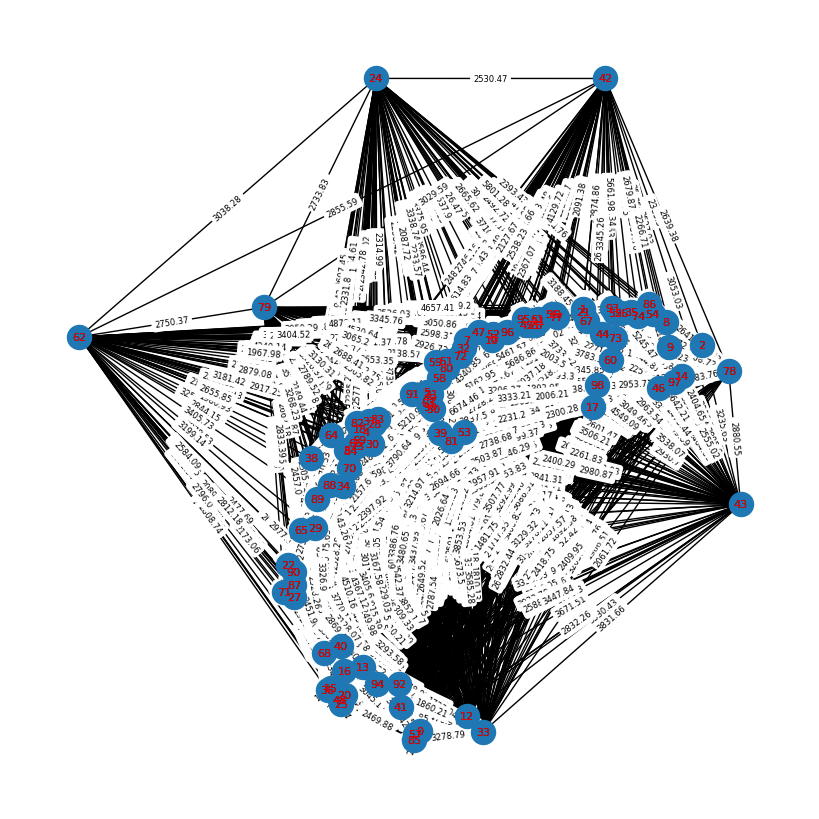

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def label_propagation(G):
    # Inicialização
    labels = {node: node for node in G.nodes}
    
    # Propagação de rótulos
    while True:
        # Criar uma cópia dos rótulos atuais
        labels_prev = labels.copy()
        
        # Atualizar os rótulos dos nós não rotulados
        for node in G.nodes:
            if node not in labels:
                label_counts = {}
                neighbors = G.neighbors(node)
                
                # Contar os rótulos dos vizinhos
                for neighbor in neighbors:
                    neighbor_label = labels[neighbor]
                    if neighbor_label in label_counts:
                        label_counts[neighbor_label] += 1
                    else:
                        label_counts[neighbor_label] = 1
                
                # Atribuir o rótulo mais comum aos nós não rotulados
                if label_counts:
                    max_count = max(label_counts.values())
                    max_labels = [label for label, count in label_counts.items() if count == max_count]
                    labels[node] = np.random.choice(max_labels)
        
        # Verificar se houve alteração nos rótulos
        if labels == labels_prev:
            break
    
    return labels

# Definir matriz de adjacência
"""adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699],
                       [2196.96020508, 0.0, 1833.59375],
                       [1928.50866699, 1833.59375, 0.0]])"""

# Arredondar as matrizes
adj_matrix = np.round(adj_matrix, 2)

# Criar grafo não-direcionado
G = nx.Graph()

# Adicionar nós ao grafo
for i in range(adj_matrix.shape[0]):
    G.add_node(i)

# Adicionar arestas ao grafo com pesos
for i in range(adj_matrix.shape[0]):
    for j in range(i + 1, adj_matrix.shape[0]):
        G.add_edge(i, j, weight=adj_matrix[i, j])

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo
pos = nx.spring_layout(G, weight='weight')
nx.draw(G, pos)

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Executar o algoritmo de detecção de propagação de rótulo
labels = label_propagation(G)

# Adicionar os rótulos atribuídos aos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='red')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color='black')

plt.show()


#Testes


In [ ]:
import numpy as np
import librosa

# definindo as funções para processar os áudios e calcular a similaridade
def load_audio(file_path):    
  audio, sr = librosa.load(file_path)
  return audio, sr
def extract_features(audio, sr):
  features = librosa.feature.mfcc(y=audio, sr=sr)
  return features
def calculate_similarity(features1, features2):    
  return np.linalg.norm(features1 - features2)

data_dir = "./cv-corpus-13.0-2023-03-09"
audio_list = []
# carrega o arquivo de áudio
count = 0
for root, dirs, files in os.walk(data_dir):
  for name in files:
    if(name.endswith('.mp3')):
      audio_list.append(os.path.join(root, name))
      count+=1
    if count == 10:
      break

num_audios = len(audio_list)
features_list = []

for item in audio_list:
  audio, sr = load_audio(str(item))
  audio = librosa.util.fix_length(data=audio, size=sr * 3)
  features = extract_features(audio, sr)
  features_list.append(features)


# criando a matriz de adjacência a partir das similaridades entre os áudios
adj_matrix = np.zeros((num_audios, num_audios))

for i in range(num_audios):
    for j in range(i+1, num_audios):
        similarity = calculate_similarity(features_list[i], features_list[j])
        adj_matrix[i, j] = similarity
        adj_matrix[j, i] = similarity

# imprimindo a matriz de adjacência
print(adj_matrix)



import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 


# Definir matriz de adjacência 
#adj_matrix = np.array([[0.0, 2196.96020508, 1928.50866699], 
                       #[2196.96020508, 0.0, 1833.59375], 
                       #[1928.50866699, 1833.59375, 0.0]]) 

# Arredonda as matrizes
adj_matrix = np.round(adj_matrix, 2) 

# Criar grafo não-direcionado 
G = nx.Graph()
 
# Adicionar nós ao grafo 
for i in range(adj_matrix.shape[0]): 
    G.add_node(i)

labels = {i: f"{i}" for i in range(adj_matrix.shape[0])}
 
# Adicionar arestas ao grafo com pesos 
for i in range(adj_matrix.shape[0]): 
    for j in range(i+1, adj_matrix.shape[0]): 
        G.add_edge(i, j, weight=adj_matrix[i, j]) 
 
# Detecção de comunidades usando o algoritmo Louvain do networkx
partition = nx.algorithms.community.label_propagation_communities(G)

# Definir o tamanho da figura
plt.figure(figsize=(8, 8))

# Exibir grafo
pos = nx.spring_layout(G, weight='weight')
nx.draw(G, pos)

# Adicionar os rótulos dos vértices
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Adicionar os rótulos das arestas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='black')

# Colorir os nós de acordo com as comunidades
values = [0] * len(G.nodes())  # inicializa valores para cada nó
for i, community in enumerate(partition):
    for node in community:
        values[node] = i
nx.draw_networkx_nodes(G, pos, node_color=values, cmap=plt.cm.get_cmap('viridis'))

plt.show()